### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure:혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [122]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')
df_data = pd.read_csv("https://raw.githubusercontent.com/the9world/My_Study/main/Z_running_file/Pima%20Indians%20Diabetes%20Database/diabetes.csv")

In [123]:
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [124]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
df_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [126]:
df_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [127]:
df_data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [128]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8))=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(18,8)
sns.scatterplot(data = df_data, x='Pregnancies', y='Outcome',ax=ax1)
sns.scatterplot(data = df_data, x='Glucose', y='Outcome',ax=ax2)
sns.scatterplot(data = df_data, x='BloodPressure', y='Outcome',ax=ax3)
sns.scatterplot(data = df_data, x='SkinThickness', y='Outcome',ax=ax4)
sns.scatterplot(data = df_data, x='Insulin', y='Outcome',ax=ax5)
sns.scatterplot(data = df_data, x='BMI', y='Outcome',ax=ax6)
sns.scatterplot(data = df_data, x='DiabetesPedigreeFunction', y='Outcome',ax=ax7)
sns.scatterplot(data = df_data, x='Age', y='Outcome',ax=ax8)

<Axes: xlabel='Age', ylabel='Outcome'>

Error in callback <function flush_figures at 0x000001F0416CA5E0> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='Age', ylabel='count'>

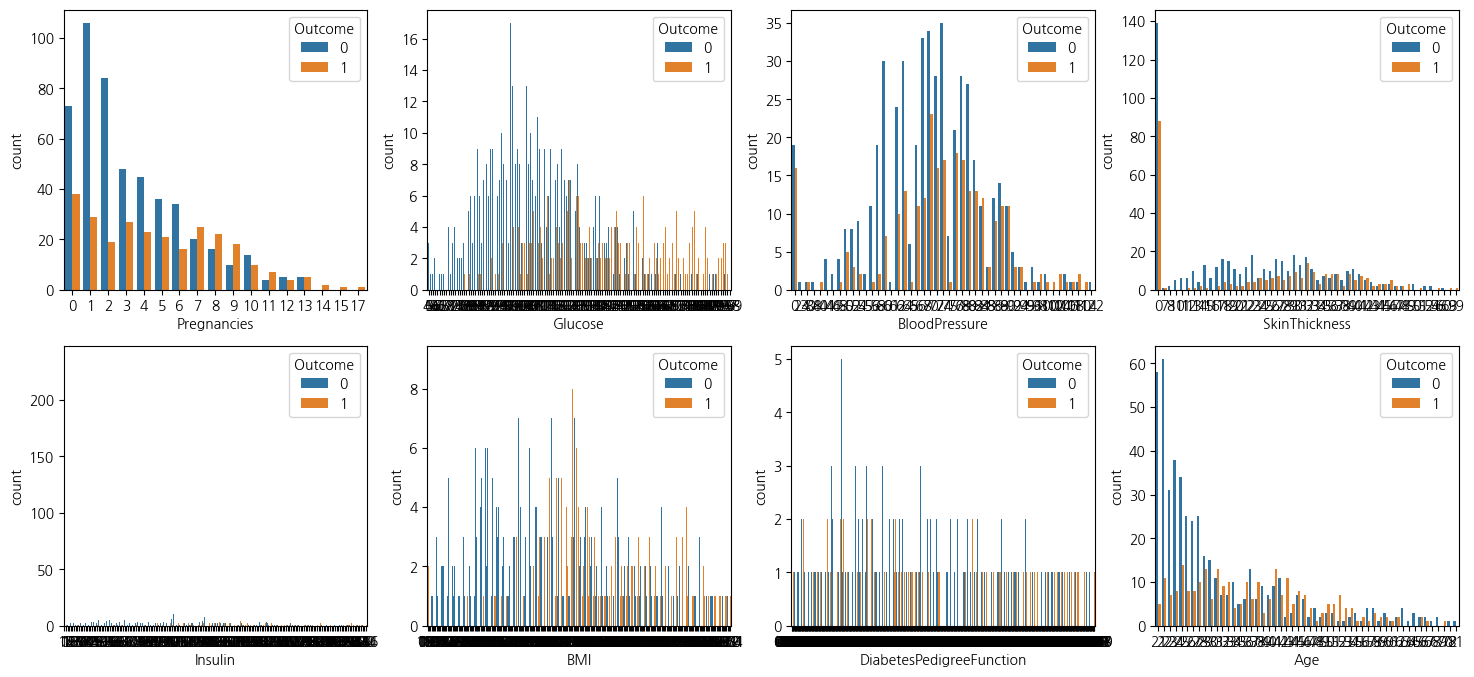

In [ ]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8))=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(18,8)
sns.countplot(data = df_data, x='Pregnancies', hue='Outcome', ax=ax1)
sns.countplot(data = df_data, x='Glucose', hue='Outcome',ax=ax2)
sns.countplot(data = df_data, x='BloodPressure', hue='Outcome',ax=ax3)
sns.countplot(data = df_data, x='SkinThickness', hue='Outcome',ax=ax4)
sns.countplot(data = df_data, x='Insulin', hue='Outcome',ax=ax5)
sns.countplot(data = df_data, x='BMI', hue='Outcome',ax=ax6)
sns.countplot(data = df_data, x='DiabetesPedigreeFunction', hue='Outcome',ax=ax7)
sns.countplot(data = df_data, x='Age', hue='Outcome',ax=ax8)

<Axes: xlabel='Pregnancies', ylabel='count'>

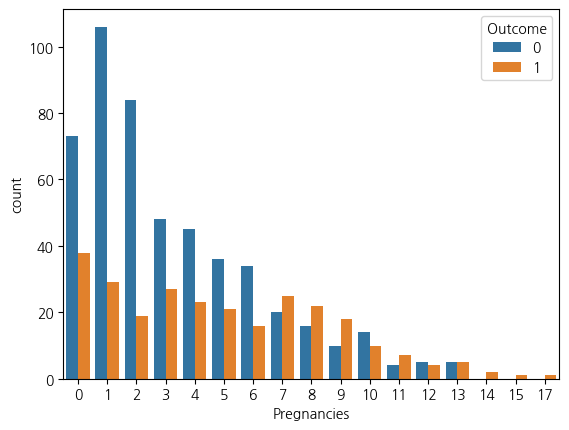

In [ ]:
sns.countplot(x='Pregnancies', hue='Outcome', data= df_data)

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

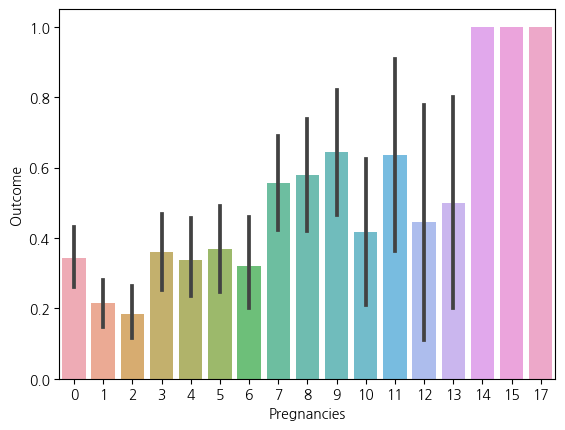

In [ ]:
sns.barplot(x=df_data['Pregnancies'], y= df_data['Outcome'], alpha=0.8)

In [ ]:
bins= [20, 30, 40, 50, 60, 70]
age_bins = pd.cut(df_data['Age'], bins)


In [ ]:
age_bins

0      (40, 50]
1      (30, 40]
2      (30, 40]
3      (20, 30]
4      (30, 40]
         ...   
763    (60, 70]
764    (20, 30]
765    (20, 30]
766    (40, 50]
767    (20, 30]
Name: Age, Length: 768, dtype: category
Categories (5, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [ ]:
group_names= ["20~30대", "30~40대", "40~50대", "50대~60대 ","60대~70대"]
age_category= pd.cut(df_data["Age"], bins, labels=group_names)


In [ ]:
age_category.head()

0    40~50대
1    30~40대
2    30~40대
3    20~30대
4    30~40대
Name: Age, dtype: category
Categories (5, object): ['20~30대' < '30~40대' < '40~50대' < '50대~60대 ' < '60대~70대']

<Axes: xlabel='Age', ylabel='Outcome'>

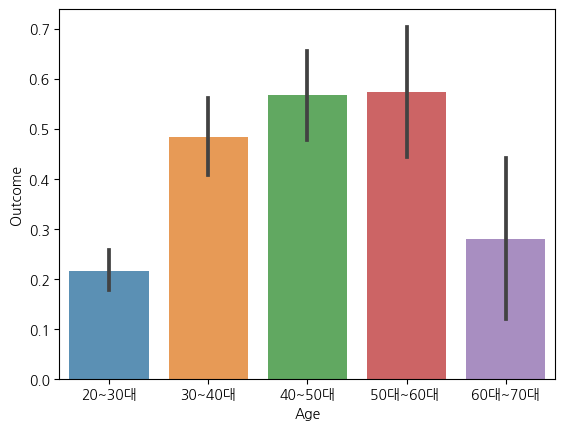

In [ ]:
sns.barplot(x=age_category, y=df_data["Outcome"], alpha=0.8)

<Axes: xlabel='Age', ylabel='Outcome'>

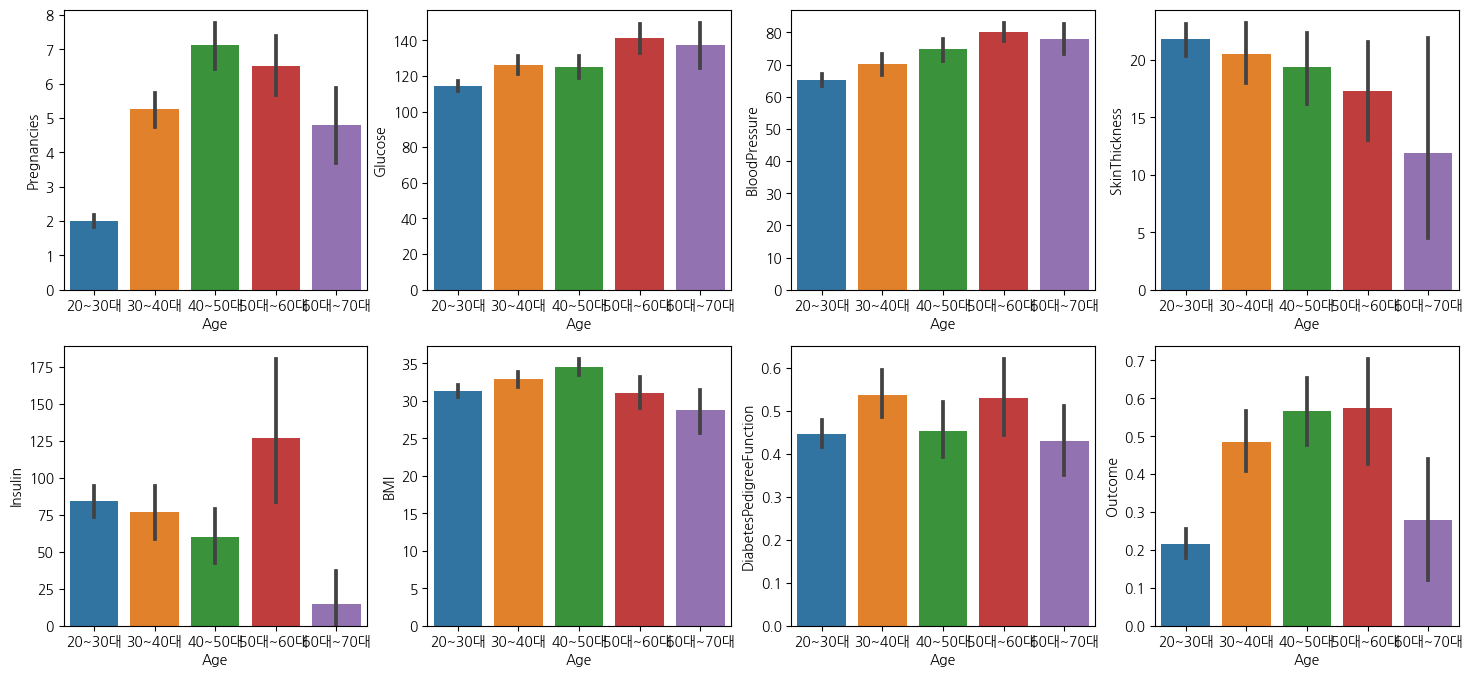

In [ ]:
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8))=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(18,8)
sns.barplot(y=df_data['Pregnancies'], x= age_category, ax=ax1)
sns.barplot(y=df_data['Glucose'], x= age_category, ax=ax2)
sns.barplot(y=df_data['BloodPressure'], x= age_category, ax=ax3)
sns.barplot(y=df_data['SkinThickness'], x= age_category, ax=ax4)
sns.barplot(y=df_data['Insulin'], x= age_category, ax=ax5)
sns.barplot(y=df_data['BMI'], x= age_category, ax=ax6)
sns.barplot(y=df_data['DiabetesPedigreeFunction'], x= age_category, ax=ax7)
sns.barplot( y=df_data['Outcome'], x= age_category, ax=ax8)


<Axes: xlabel='BMI', ylabel='Count'>

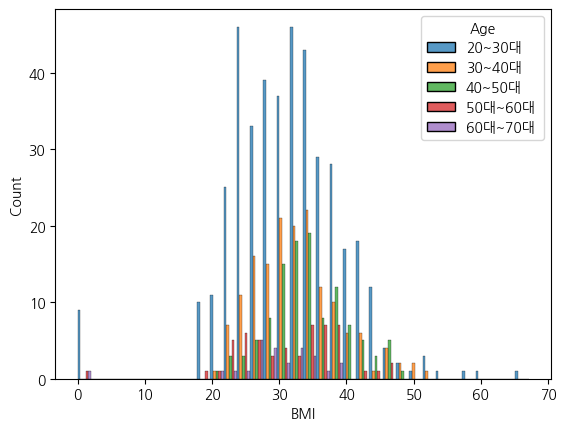

In [ ]:
sns.histplot(x=df_data["BMI"], multiple='dodge', hue=age_category)

In [135]:
sns.pointplot(x="BMI", y="Insulin", data=df_data)

TypeError: pointplot() got an unexpected keyword argument 'bin'

<Axes: >

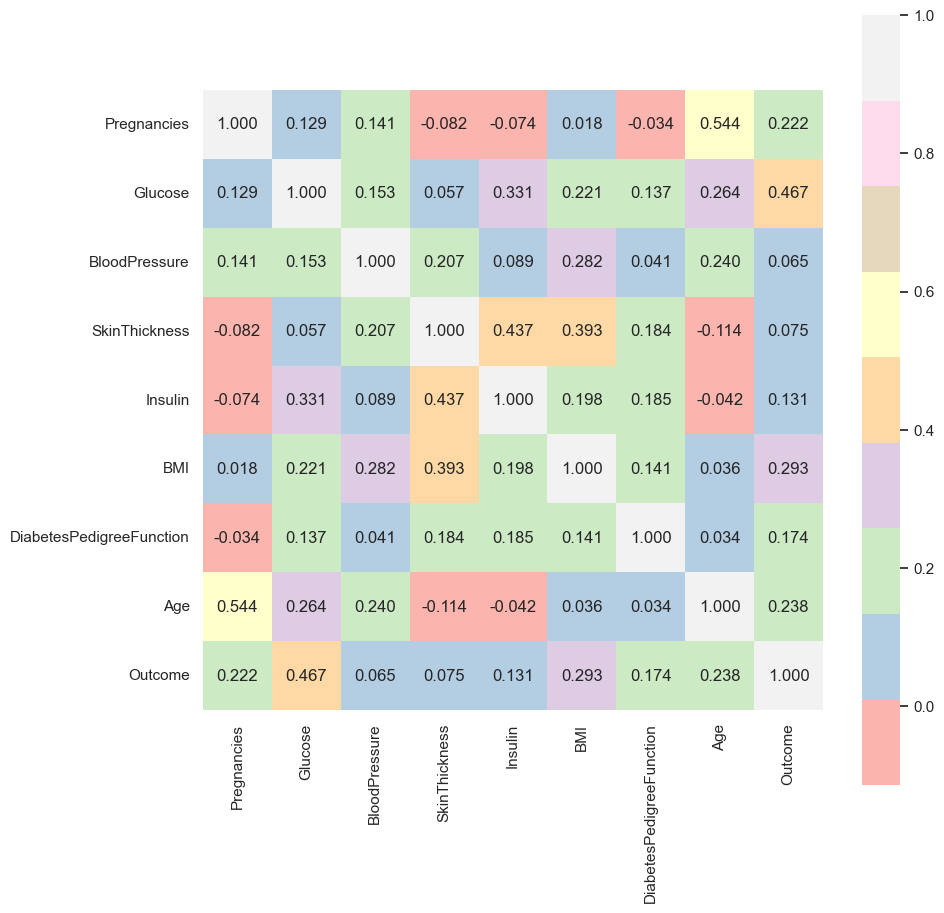

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_data.corr(), fmt='.3f', annot=True, cmap='Pastel1',square=True)

<Axes: xlabel='Outcome', ylabel='Density'>

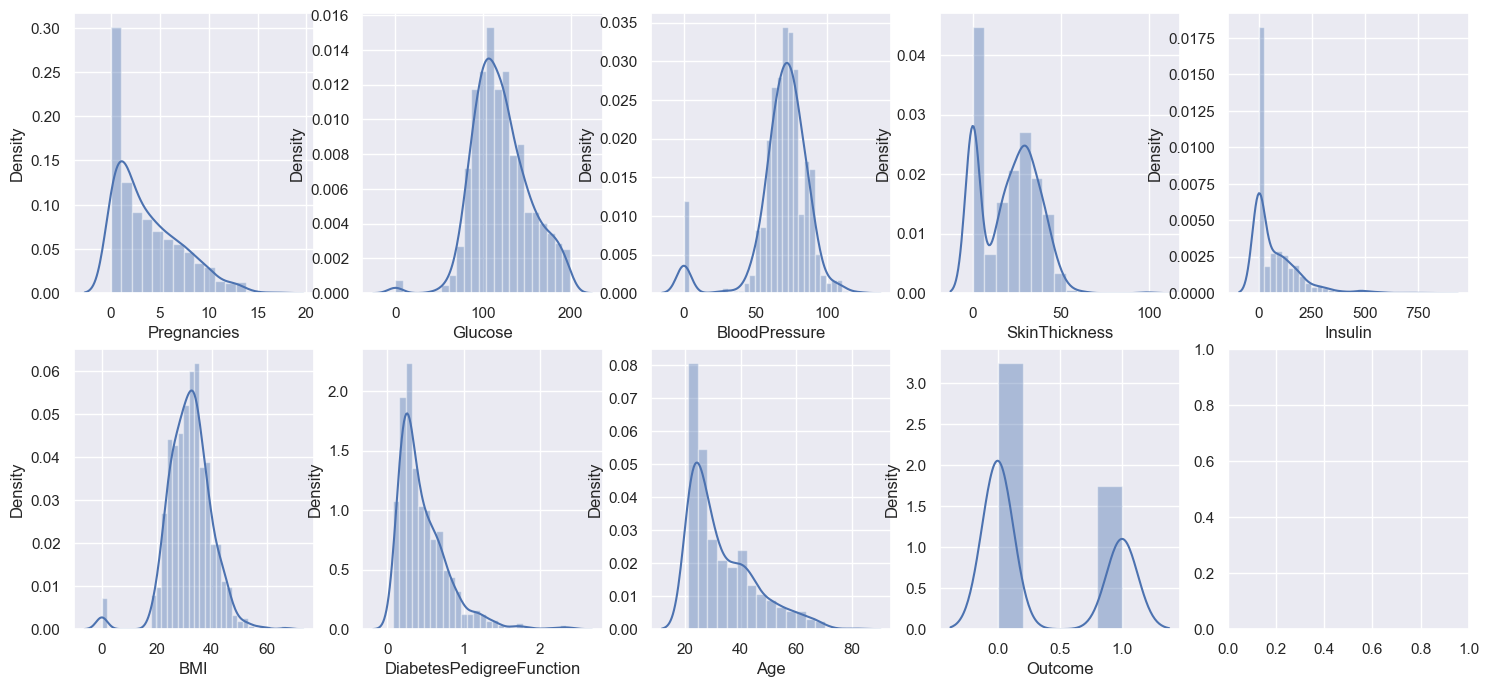

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10))=plt.subplots(nrows=2,ncols=5)
fig.set_size_inches(18,8)
sns.distplot(df_data['Pregnancies'], ax=ax1)
sns.distplot(df_data['Glucose'], ax=ax2)
sns.distplot(df_data['BloodPressure'], ax=ax3)
sns.distplot(df_data['SkinThickness'], ax=ax4)
sns.distplot(df_data['Insulin'], ax=ax5)
sns.distplot(df_data['BMI'], ax=ax6)
sns.distplot(df_data['DiabetesPedigreeFunction'], ax=ax7)
sns.distplot(df_data['Age'], ax=ax8)
sns.distplot(df_data['Outcome'], ax=ax9)

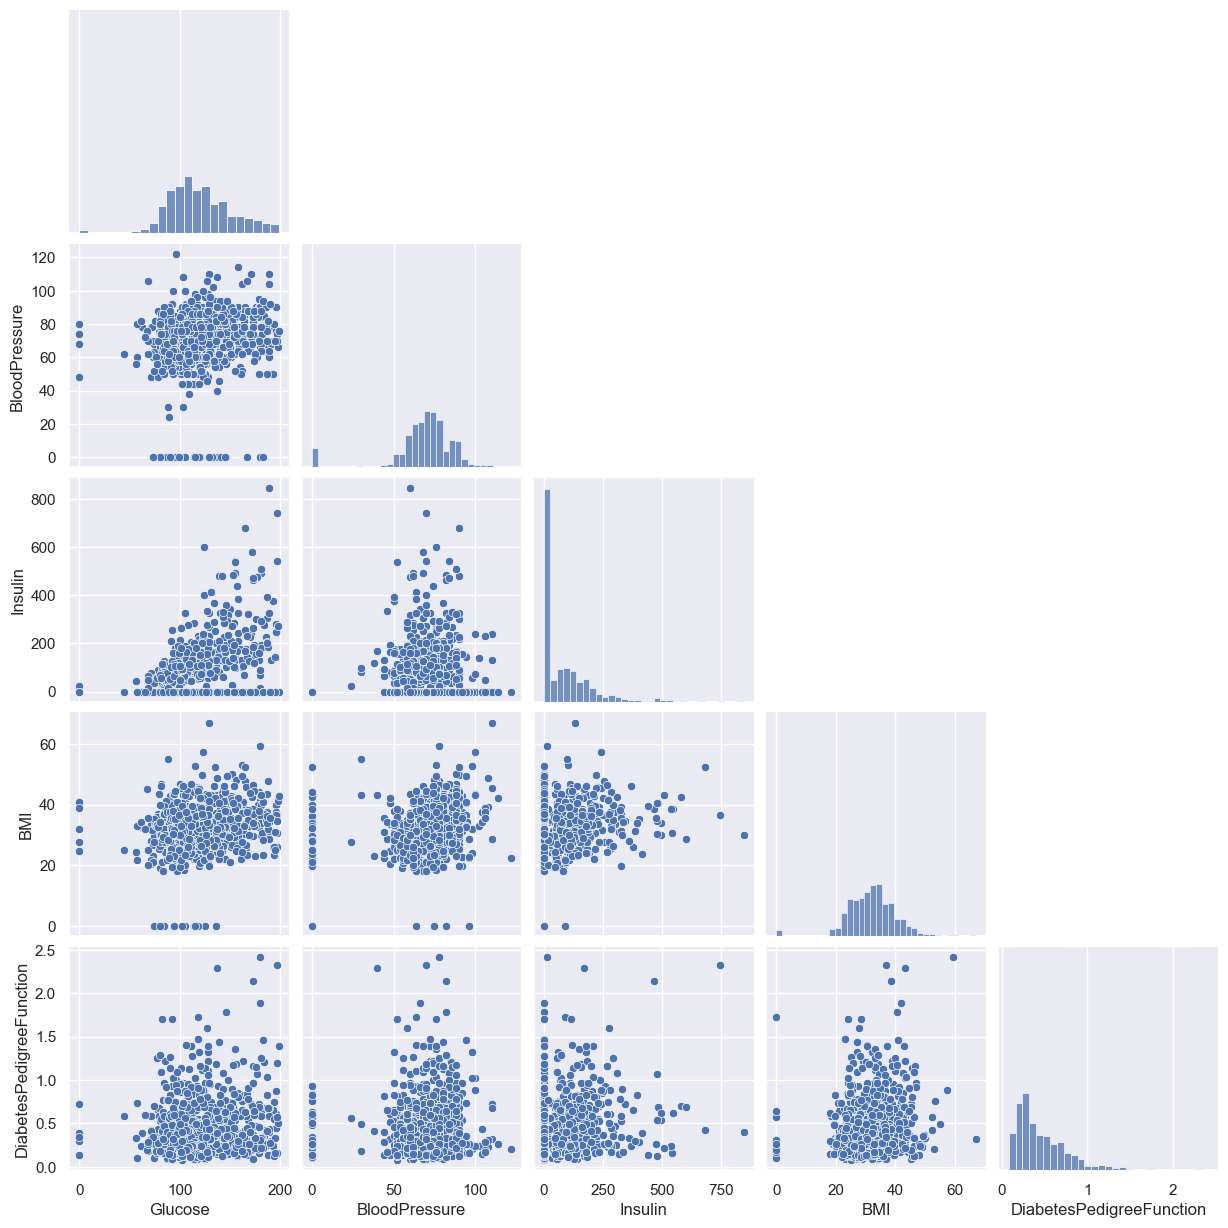

In [ ]:
fig= sns.pairplot(df_data[["Glucose", "BloodPressure", "Insulin",
                           "BMI", "DiabetesPedigreeFunction"]], corner=True)


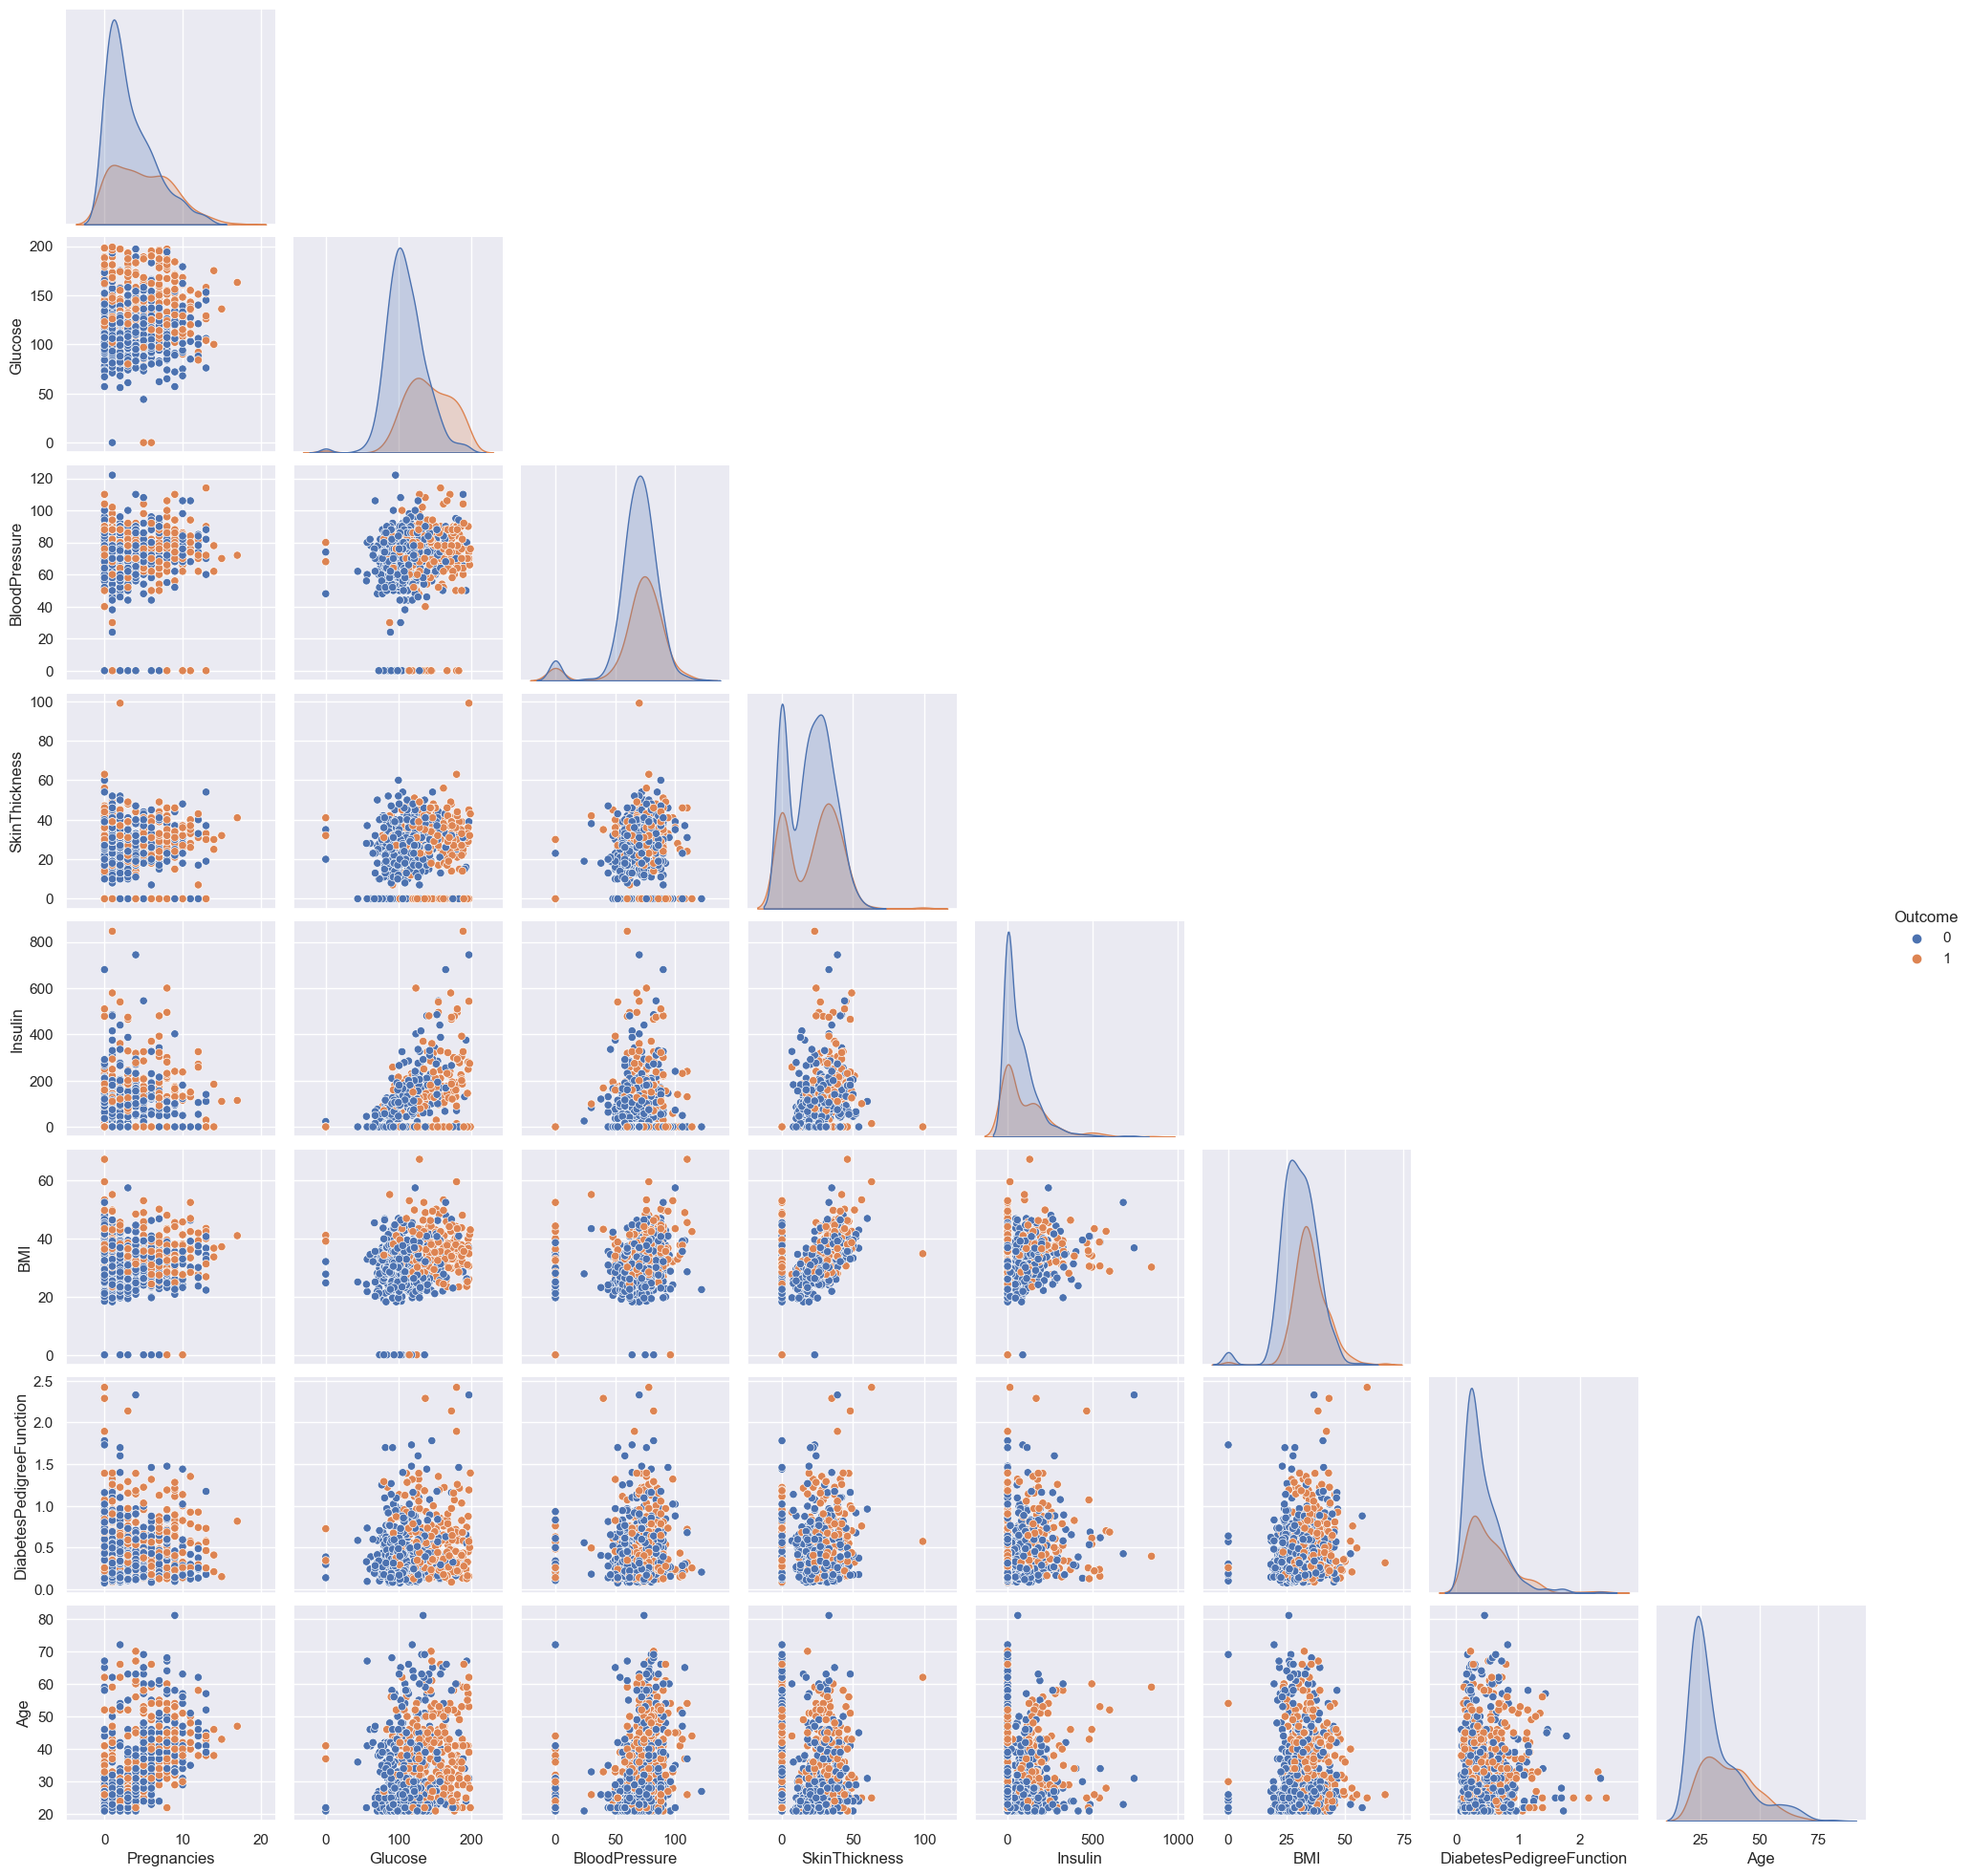

In [ ]:
fig= sns.pairplot(df_data, hue="Outcome", corner=True)

<Axes: xlabel='BMI', ylabel='Density'>

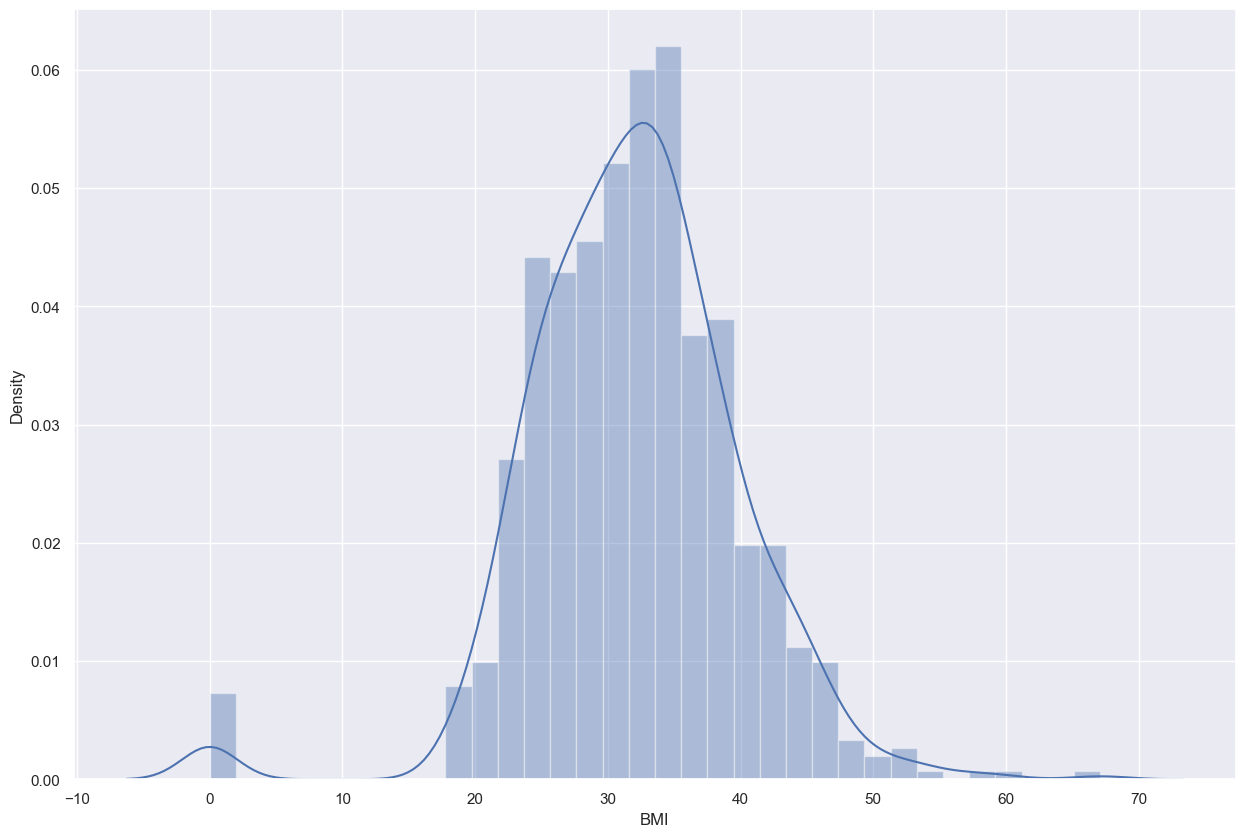

In [139]:
sns.distplot(df_data['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='BMI'>

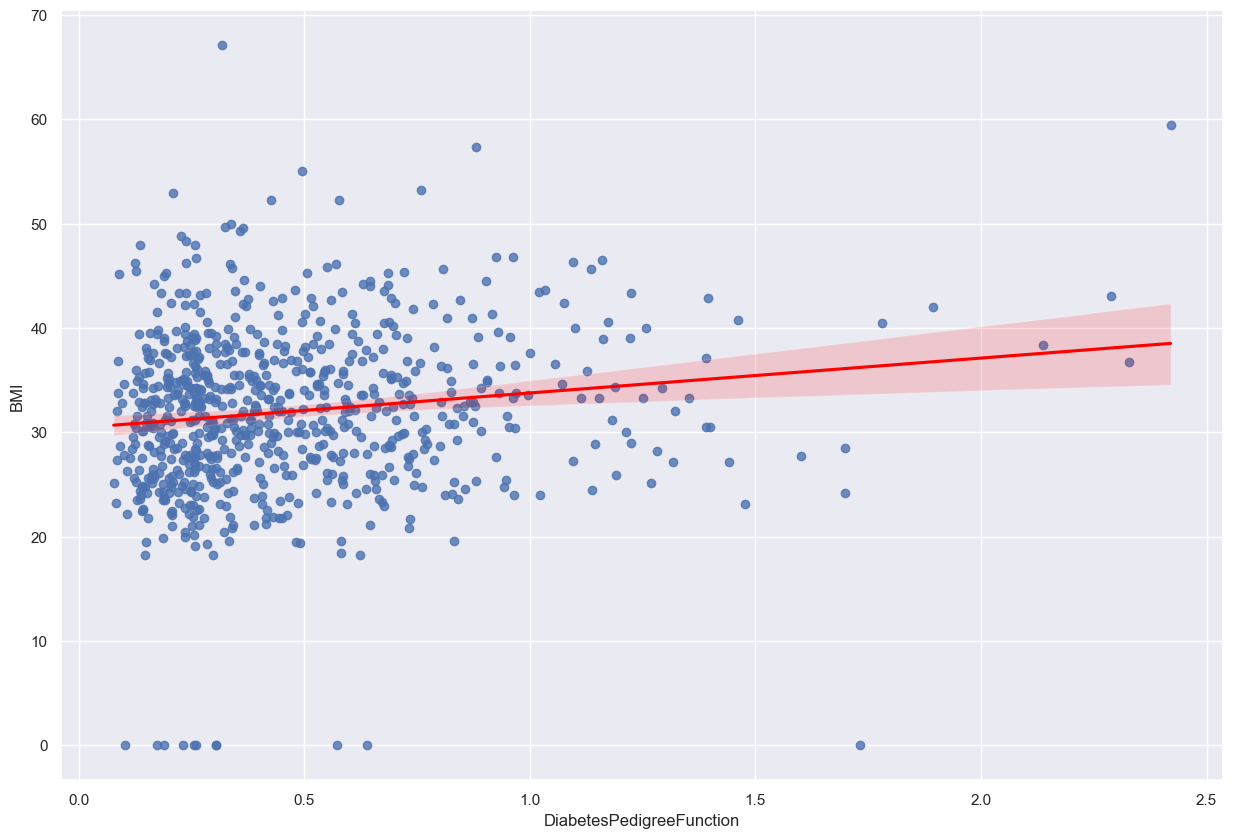

In [145]:
sns.regplot(x='DiabetesPedigreeFunction', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='BloodPressure', ylabel='BMI'>

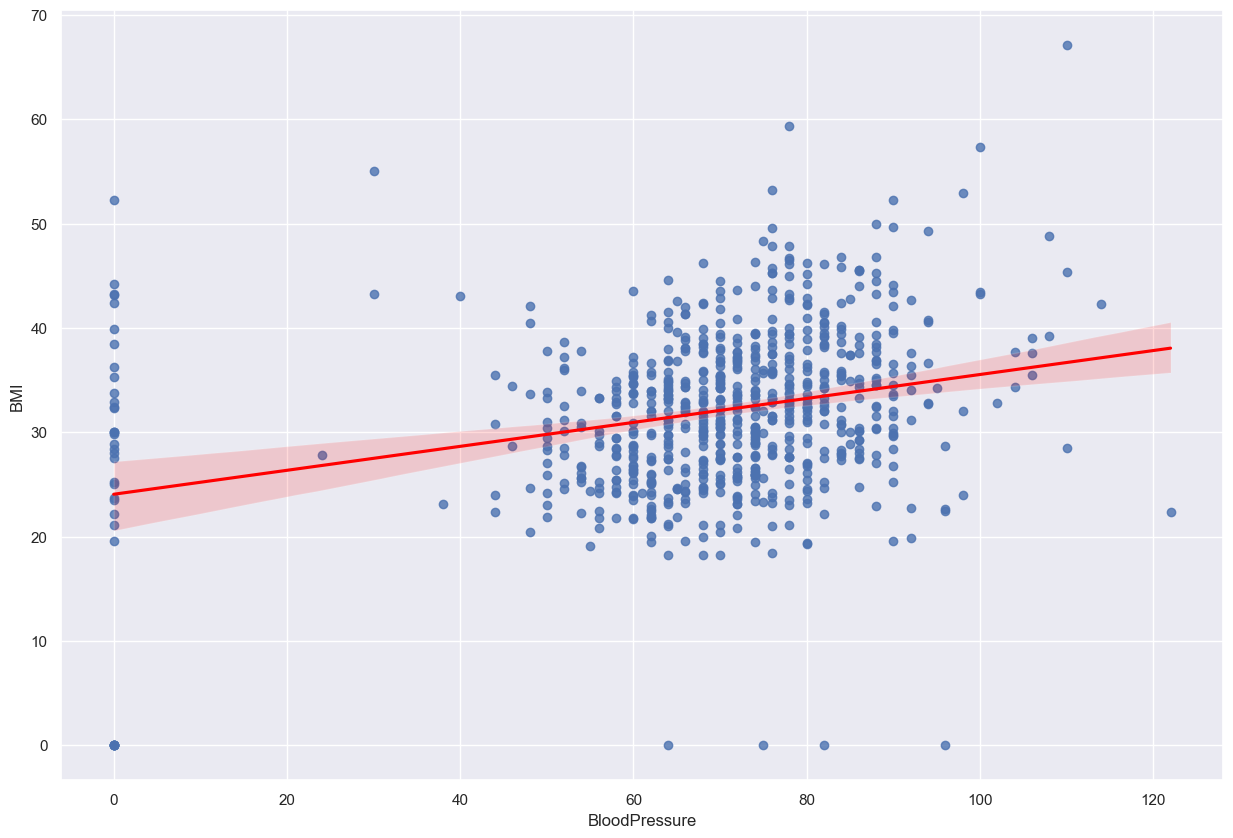

In [146]:
sns.regplot(x='BloodPressure', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Glucose', ylabel='BMI'>

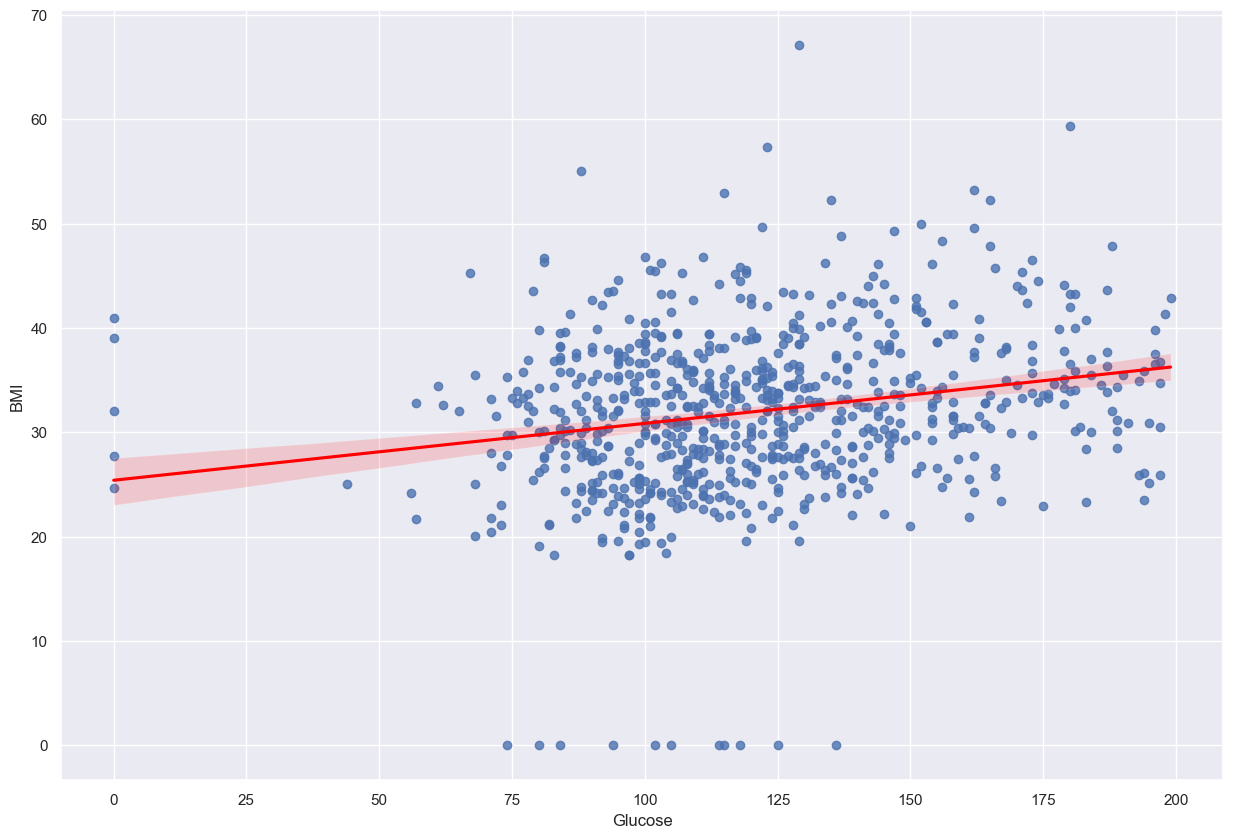

In [160]:
sns.regplot(x='Glucose', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='SkinThickness', ylabel='BMI'>

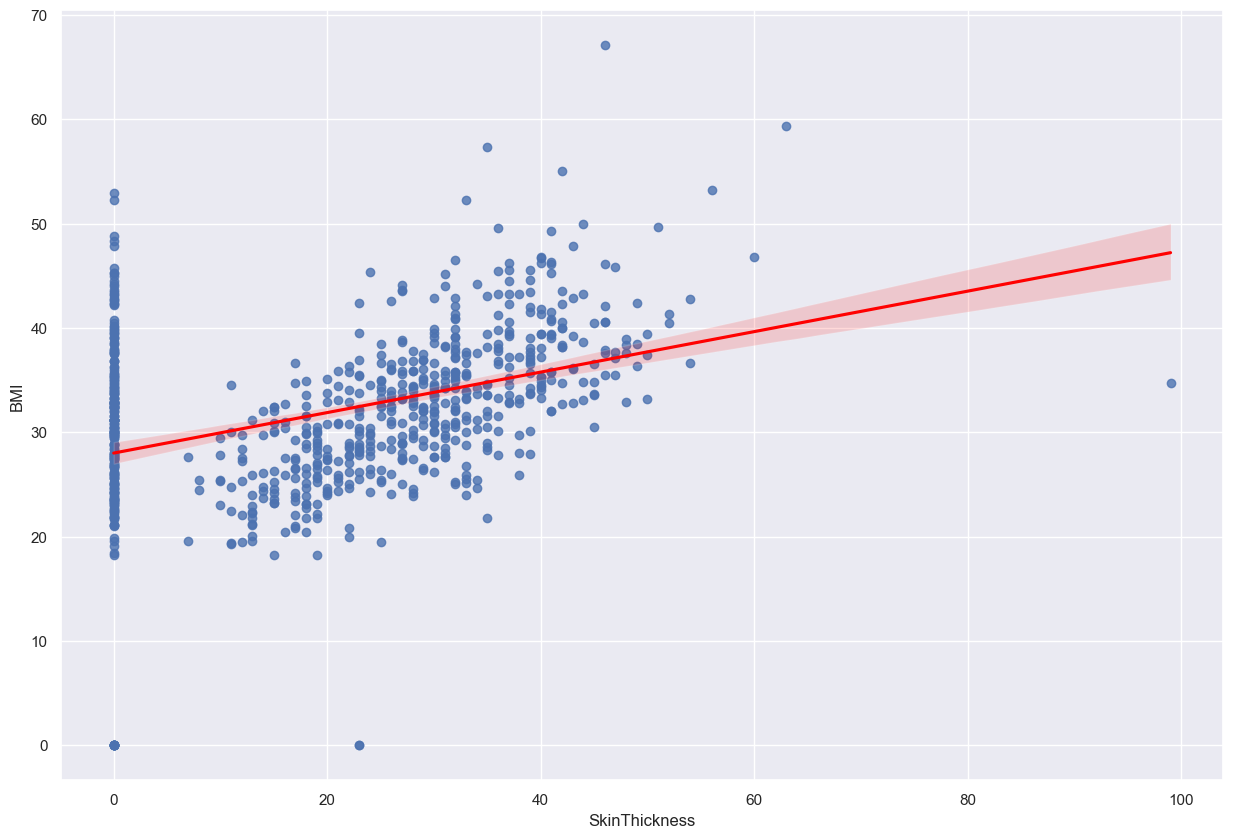

In [162]:
sns.regplot(x='SkinThickness', y='BMI', data=df_data, line_kws={"color": "red"})

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

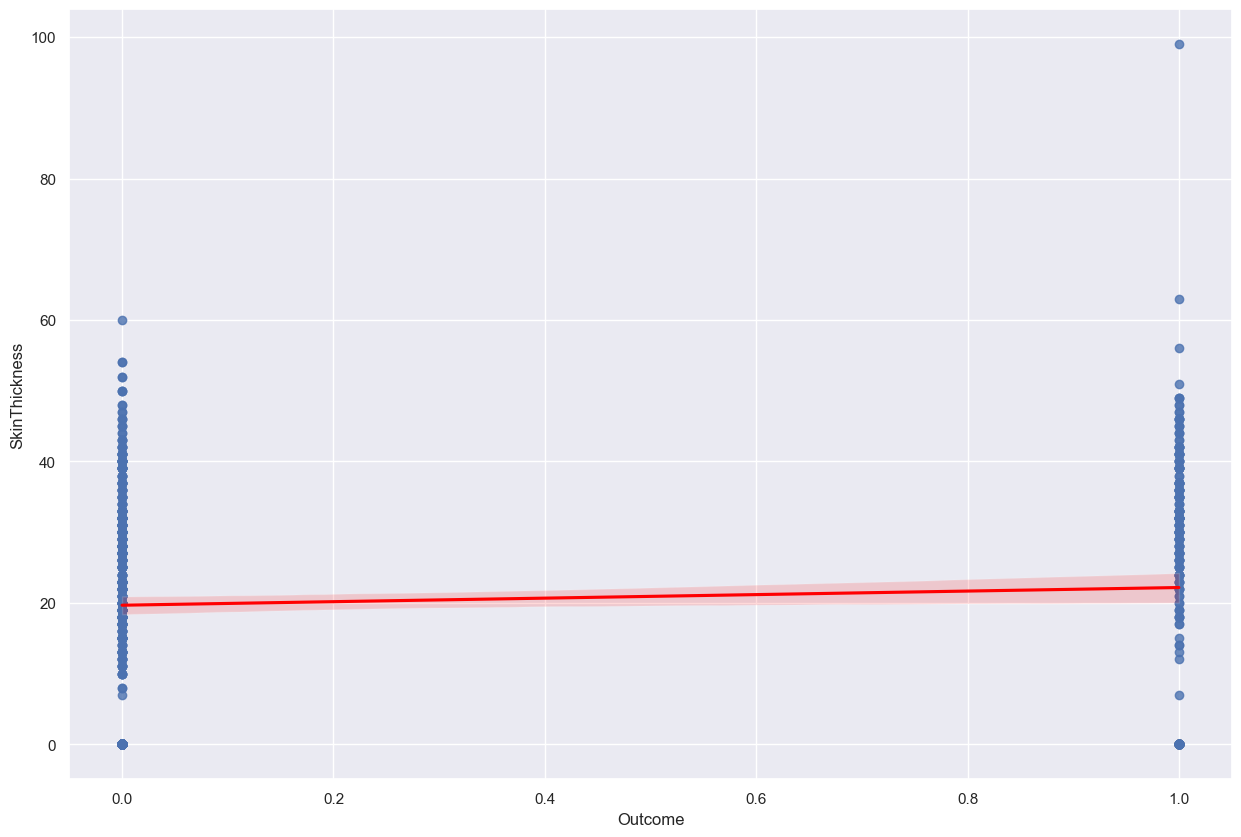

In [166]:
sns.regplot(y='SkinThickness', x='Outcome', data=df_data, line_kws={"color": "red"})

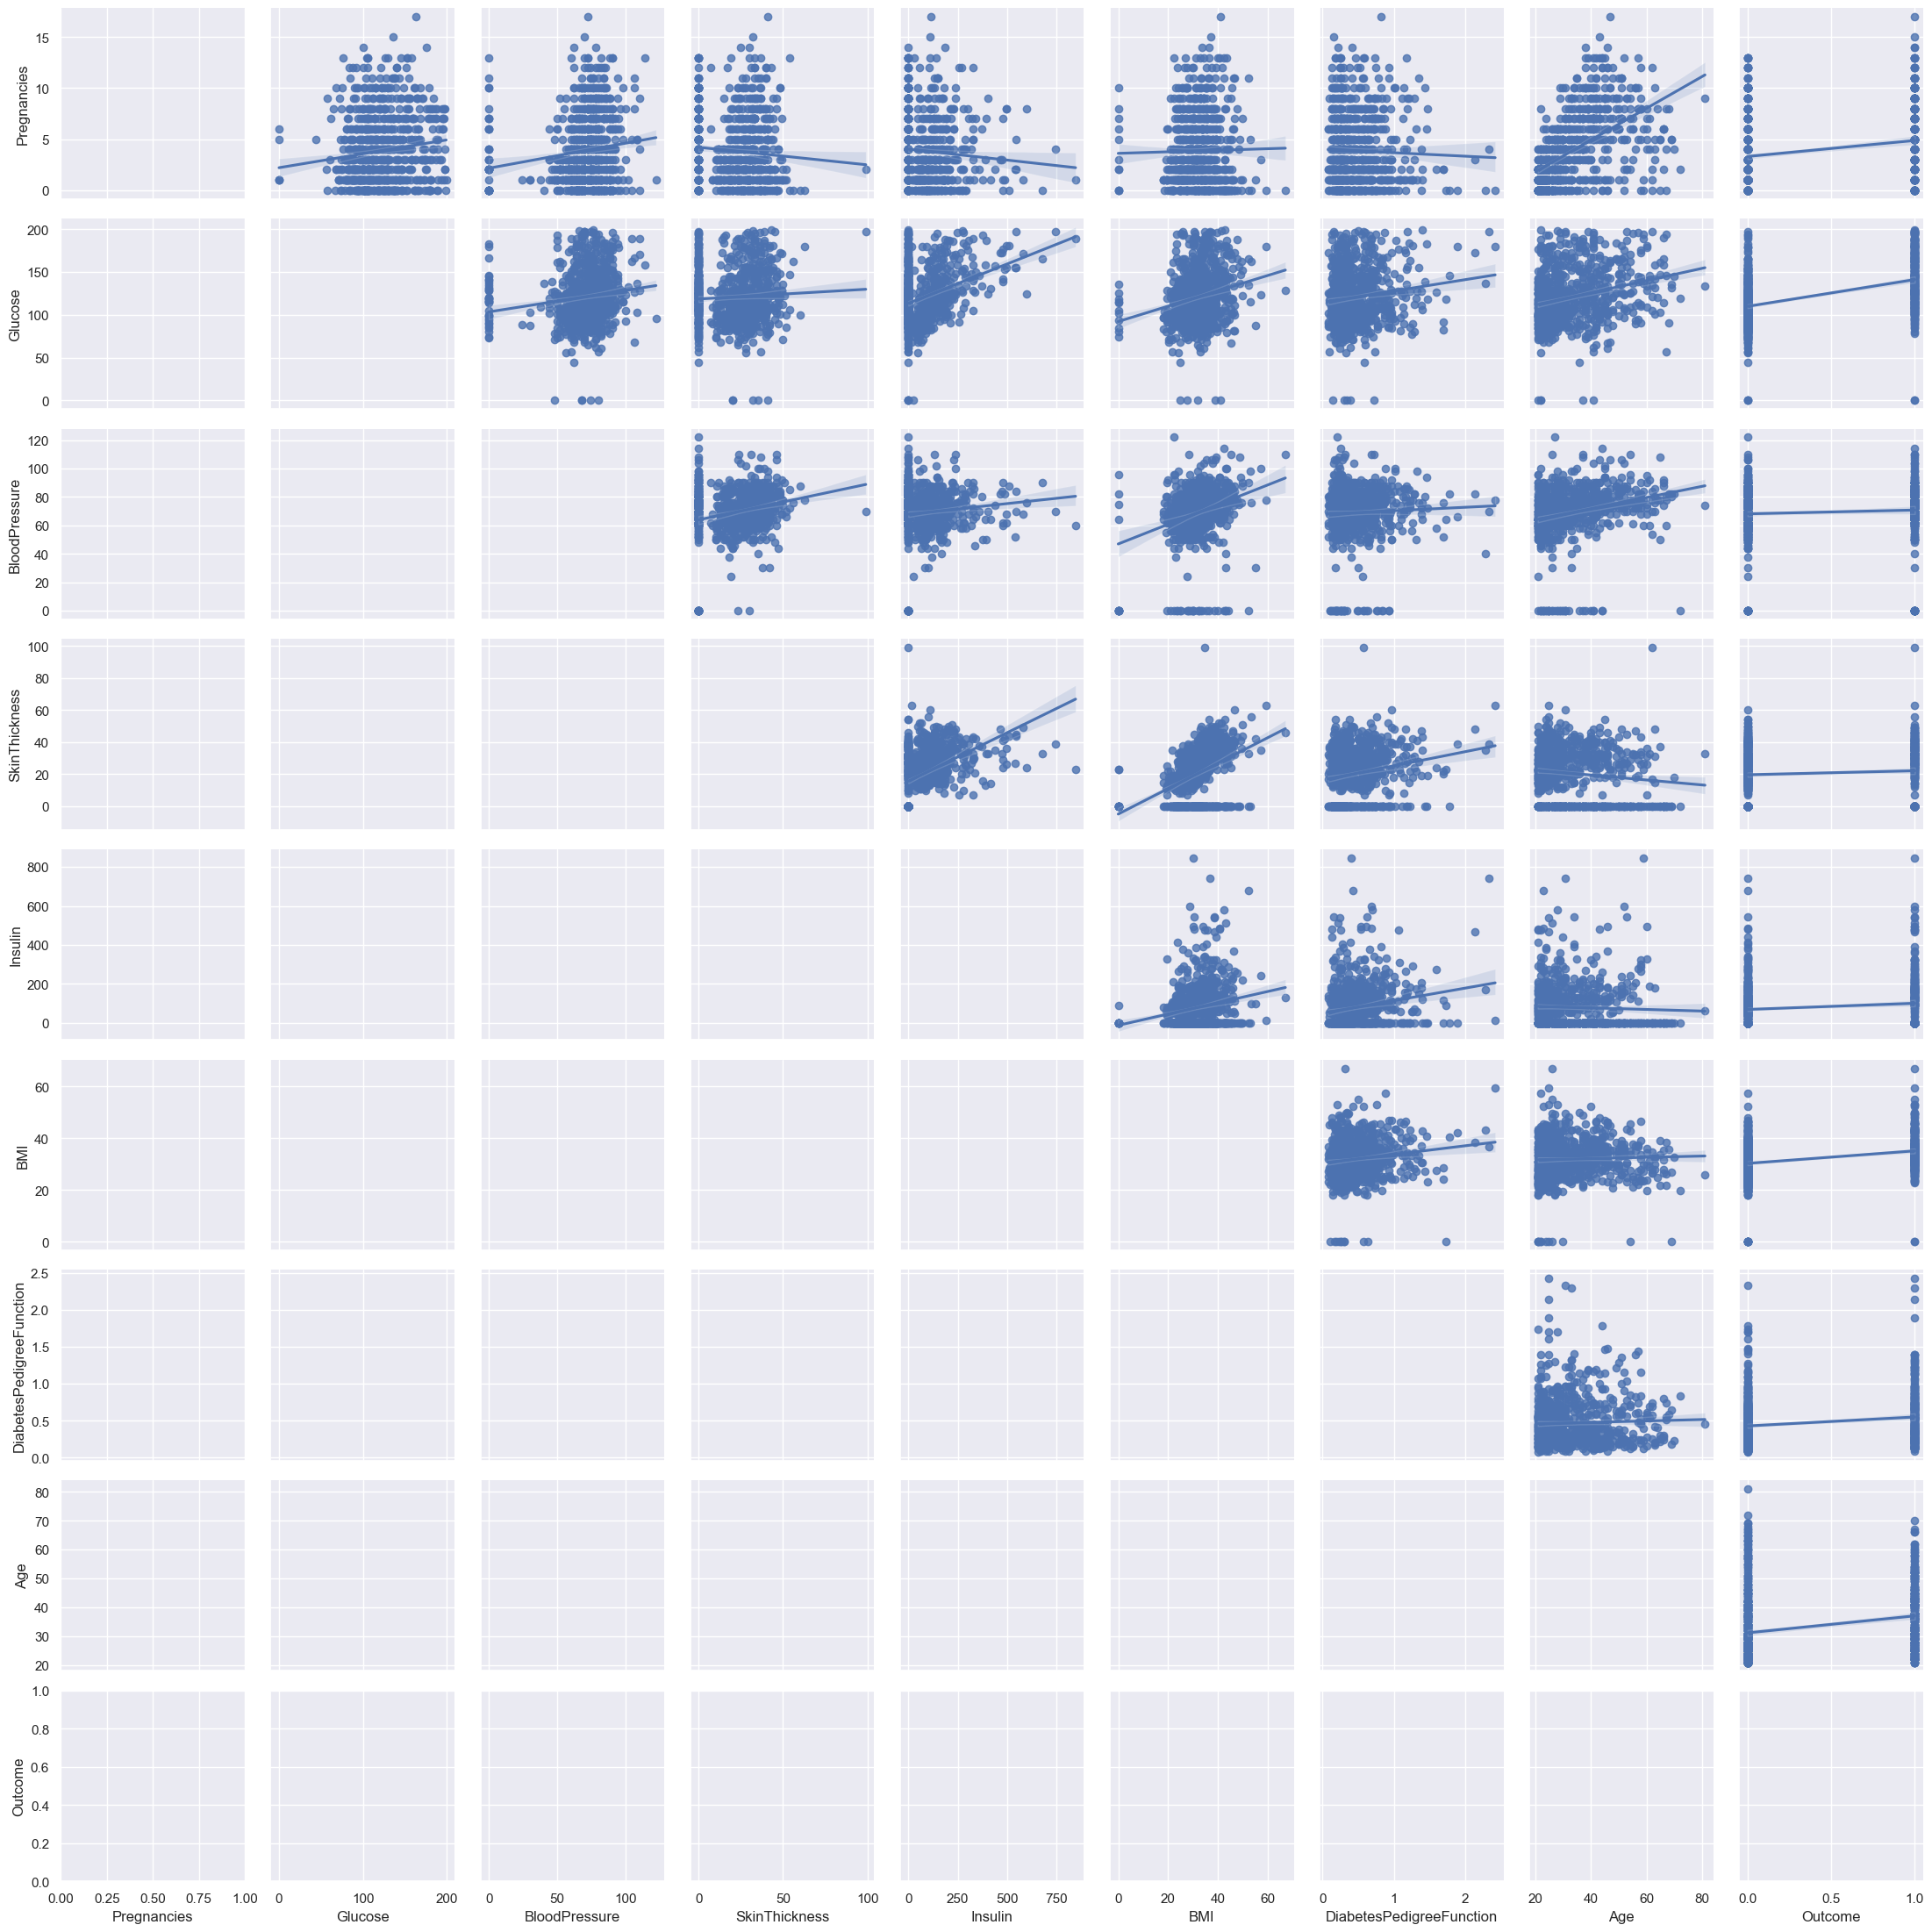

In [150]:
pg = sns.PairGrid(df_data)
pg.map_upper(sns.regplot)

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, label='test')  
plt.scatter(X_test['bmi'], pred, c='r', label='predict')  
plt.legend() 
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 1000x600 with 0 Axes>